<a href="https://colab.research.google.com/github/y-lims/DADS7202_Potato/blob/main/simple_kmean_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import LIB

In [1]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

from google.colab import drive
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

import os
import sys
import numpy as np
import pandas as pd
import random as rn
import sklearn
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image, display
import matplotlib.cm as cmp
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

import os
import numpy as np
import tensorflow as tf

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt



Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]

NumPy 1.26.4

Matplotlib 3.7.1

TensorFlow 2.17.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


# Pre Classification

In [57]:
# Set fixed seeding values for reproducability during experiments
# Skip this cell if random initialization (with varied results) is needed
np_random_seed = 2
tf_random_seed = 2
model_name = 'vgg16'
version = 'v1'
seedno = 2
owner_name = 'l_model'


np.random.seed(np_random_seed)
tf.random.set_seed(tf_random_seed)

In [58]:
incorr_indices_read = pd.read_csv(f'/content/drive/My Drive/Final_Potato/{owner_name}/img_read_seq.csv')
incorr_indices_read

,index,class,filename
0,0,Healthy,freshPotato (503).jpg
1,1,Healthy,freshPotato (410).jpg
2,2,Healthy,freshPotato (17).jpg
3,3,Healthy,freshPotato (273).jpg
4,4,Healthy,freshPotato (316).jpg
...,...,...,...
597,597,Dry Rot,36.jpg
598,598,Dry Rot,7.jpg
599,599,Dry Rot,60.jpg
600,600,Dry Rot,9.jpg


==== Blackleg ====
Shape of x (Blackleg): (60, 224, 224, 3)
Shape of y (Blackleg): (60,)
latest index :  59


array([[[230, 237, 243],
        [230, 237, 243],
        [231, 238, 244],
        ...,
        [220, 225, 231],
        [219, 224, 230],
        [219, 224, 230]],

       [[230, 237, 243],
        [230, 237, 243],
        [231, 238, 244],
        ...,
        [219, 224, 230],
        [219, 224, 230],
        [220, 225, 231]],

       [[231, 238, 244],
        [231, 238, 244],
        [232, 239, 245],
        ...,
        [218, 223, 229],
        [219, 224, 230],
        [220, 225, 231]],

       ...,

       [[235, 240, 244],
        [235, 240, 244],
        [236, 241, 245],
        ...,
        [216, 219, 226],
        [216, 219, 226],
        [216, 219, 226]],

       [[235, 240, 244],
        [235, 240, 244],
        [236, 241, 245],
        ...,
        [216, 219, 226],
        [216, 219, 226],
        [216, 219, 226]],

       [[235, 240, 244],
        [235, 240, 244],
        [236, 241, 245],
        ...,
        [215, 218, 225],
        [215, 218, 225],
        [215, 218, 225]]], dtype=uint8)
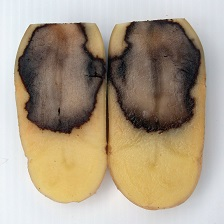

==== Black Scurf ====
Shape of x (Black Scurf): (58, 224, 224, 3)
Shape of y (Black Scurf): (58,)
latest index :  117


array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
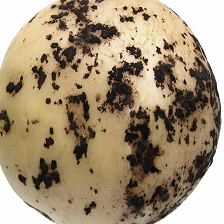


==== Pink Rot ====
Shape of x (Pink Rot): (57, 224, 224, 3)
Shape of y (Pink Rot): (57,)
latest index :  174


array([[[11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       [[11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       [[11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [16, 16, 16]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [16, 16, 16]]], dtype=uint8)
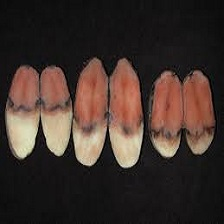


==== Common Scab ====
Shape of x (Common Scab): (62, 224, 224, 3)
Shape of y (Common Scab): (62,)
latest index :  236


array([[[ 92,  72,  47],
        [ 90,  70,  45],
        [ 89,  69,  44],
        ...,
        [136,  69,  50],
        [133,  66,  49],
        [130,  63,  46]],

       [[ 84,  64,  39],
        [ 82,  62,  37],
        [ 80,  60,  35],
        ...,
        [129,  67,  46],
        [128,  65,  47],
        [128,  65,  47]],

       [[ 81,  61,  36],
        [ 78,  58,  33],
        [ 77,  57,  33],
        ...,
        [127,  71,  48],
        [127,  70,  50],
        [129,  72,  52]],

       ...,

       [[ 46,  82, 130],
        [ 46,  84, 129],
        [ 46,  85, 128],
        ...,
        [193, 133,  63],
        [196, 136,  66],
        [203, 144,  74]],

       [[ 46,  84, 133],
        [ 44,  85, 131],
        [ 43,  84, 128],
        ...,
        [191, 130,  67],
        [186, 126,  63],
        [191, 133,  69]],

       [[ 43,  83, 134],
        [ 42,  82, 131],
        [ 41,  82, 126],
        ...,
        [191, 131,  69],
        [182, 122,  60],
        [183, 125,  62]]], dtype=uint8)
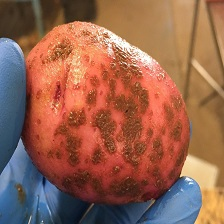


==== Dry Rot ====
Shape of x (Dry Rot): (60, 224, 224, 3)
Shape of y (Dry Rot): (60,)
latest index :  296


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 249, 248],
        [240, 249, 248],
        [240, 249, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 249, 248],
        [240, 249, 248],
        [240, 249, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 249, 248],
        [240, 249, 248],
        [241, 250, 249]]], dtype=uint8)
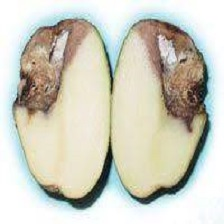

<ipython-input-59-8a0721ed8c25>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_name = i[1][1]
<ipython-input-59-8a0721ed8c25>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filename = i[1][2]


==== Healthy ====
Number of img: 305
latest index :  601


array([[[ 62,  56,  32],
        [ 63,  57,  33],
        [ 66,  60,  36],
        ...,
        [ 88,  70,  48],
        [ 86,  68,  46],
        [ 85,  67,  45]],

       [[ 66,  60,  36],
        [ 67,  61,  37],
        [ 69,  63,  39],
        ...,
        [ 88,  70,  48],
        [ 87,  69,  47],
        [ 86,  68,  46]],

       [[ 70,  64,  40],
        [ 71,  65,  41],
        [ 72,  66,  42],
        ...,
        [ 89,  71,  49],
        [ 88,  70,  48],
        [ 87,  69,  47]],

       ...,

       [[ 89,  63,  46],
        [ 90,  64,  47],
        [ 92,  66,  49],
        ...,
        [127, 101,  76],
        [126, 100,  75],
        [125,  99,  74]],

       [[ 88,  62,  45],
        [ 89,  63,  46],
        [ 91,  65,  48],
        ...,
        [126, 100,  75],
        [125,  99,  74],
        [124,  98,  73]],

       [[ 88,  62,  45],
        [ 89,  63,  46],
        [ 91,  65,  48],
        ...,
        [126, 100,  75],
        [124,  98,  73],
        [124,  98,  73]]], dtype=uint8)
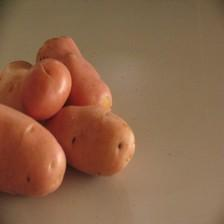

In [59]:
allowed_extensions = (".JPG", ".jpg", ".jpeg", ".JPEG", ".PNG", ".png")
class_mapping = {'Healthy': 0, 'Blackleg': 1, 'Black Scurf': 2, 'Pink Rot': 3, 'Common Scab': 4, 'Dry Rot': 5}

def process_dataset_nosplit(folder_path, class_name):

    print(f'==== {class_name} ====')
    x, y, z = [], [], []
    for filename in os.listdir(os.path.join(folder_path, class_name)):
        if filename.endswith(allowed_extensions):
            file_path = os.path.join(folder_path, class_name, filename)
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img).astype(np.uint8)
            x.append(img_array)
            y.append(class_mapping[class_name])
            z.append([class_name, filename])


    x = np.array(x)
    y = np.array(y).reshape(-1,)
    print(f"Shape of x ({class_name}):", x.shape)
    print(f"Shape of y ({class_name}):", y.shape)
    return x, y, z

# ==========================================================================================
check_ind = []
check_class = []

folder_path = '/content/drive/My Drive/Final_Potato/train_data/archive/'
x, y, z = process_dataset_nosplit(folder_path, 'Blackleg')
x_combined, y_combined, z_combined = x, y, z
print('latest index : ', len(x_combined) - 1)
display(x[0])

for i in list(class_mapping.keys())[2:]:
    x, y, z = process_dataset_nosplit(folder_path, i)
    x_combined = np.concatenate((x_combined, x), axis=0)
    y_combined = np.concatenate((y_combined, y), axis=0)
    z_combined = np.concatenate((z_combined, z), axis=0)
    print('latest index : ', len(x_combined) - 1)
    display(x[0])
    print()
    check_ind.append(len(x_combined) - 1)
    check_class.append(i)


# Healthy ==========
x, y, z = [], [], []
for i in incorr_indices_read[incorr_indices_read['class'] == 'Healthy'].iterrows():
  # print(i[1][0], i[1][1], i[1][2])
  class_name = i[1][1]
  filename = i[1][2]
  if filename.endswith(allowed_extensions):
    file_path = os.path.join(folder_path, class_name, filename)
    img = tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img).astype(np.uint8)
    x.append(img_array)
    y.append(class_mapping[class_name])
    z.append([class_name, filename])


if x != []:
  x_combined = np.concatenate((x_combined, x), axis=0)
  y_combined = np.concatenate((y_combined, y), axis=0)
  z_combined = np.concatenate((z_combined, z), axis=0)
  print('==== Healthy ====')
  check_ind.append(len(x_combined) - 1)
  check_class.append('Healthy')
  print('Number of img:',len(x))
  print('latest index : ', len(x_combined) - 1)
  display(x[0])
  print()


x_train, y_train = x_combined, y_combined

Black Scurf


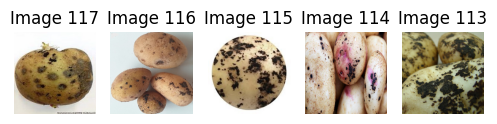

Pink Rot


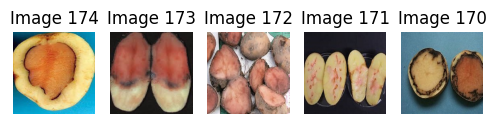

Common Scab


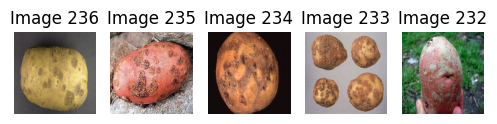

Dry Rot


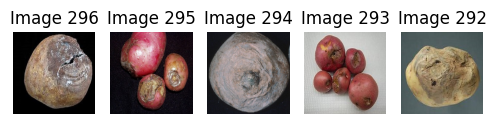

Healthy


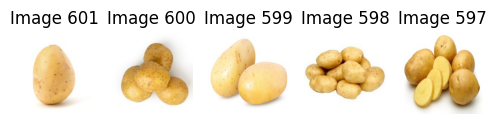

In [60]:
import matplotlib.pyplot as plt


for k,i in enumerate(check_ind):
    try:
      print(check_class[k])
      display_ind = list(range(i, i-5, -1))

      # Set up the subplots
      fig, axes = plt.subplots(1, 5, figsize=(5, 5))  # Adjust figsize for better display

      for j in range(5):
          # Display each image in the subplot
          axes[j].imshow(x_combined[display_ind[j]])
          axes[j].set_title(f"Image {display_ind[j]}")
          axes[j].axis('off')  # Hide the axes

      # Adjust layout
      plt.tight_layout()
      plt.show()
    except: pass


# Module from GitHub

In [1]:
!git clone https://github.com/niuchuangnn/SPICE.git

Cloning into 'SPICE'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 388 (delta 64), reused 92 (delta 53), pack-reused 274
Receiving objects: 100% (388/388), 178.87 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (167/167), done.
Updating files: 100% (138/138), done.


In [2]:
%cd SPICE


/content/SPICE


In [7]:
!pip install -r requirements.txt


ERROR: Could not find a version that satisfies the requirement pytorch==1.6.0 (from versions: 0.1.2, 1.0.2)
ERROR: No matching distribution found for pytorch==1.6.0


In [6]:
!python tools/train_moco.py